# CREACION DEL MODELO

Se crea un modelo para prediccion de churn del dataset "bigml_59c28831336c6604c800002a.csv" que se puede descargar del siguiente enlace de kaggle - (20 variable + objetivo con 3333 observaciones):
https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [299]:
# Carga de Librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import pandas
from joblib import dump, load
import xgboost

In [300]:
#Carga de dataframe
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [301]:
#Separamos 10 observaciones al azar para el test de la API
apiTest = df.sample(10)
df = df.drop(apiTest.index)
apiTest.to_csv('apiTest.csv', index=False)

In [302]:
# Visualizacion de las variables seleccionadas para posterior comprobacion de la API
apiTest

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1203,LA,155,408,353-4880,no,yes,39,183.3,106,31.16,...,101,17.43,263.7,90,11.87,5.1,7,1.38,1,False
955,MS,114,415,389-6790,no,yes,34,154.4,109,26.25,...,142,18.82,208.5,103,9.38,10.3,5,2.78,0,False
1682,AK,96,408,334-4506,no,yes,29,150.0,91,25.50,...,75,13.55,228.1,55,10.26,8.5,3,2.30,1,False
2314,VA,43,408,387-5411,no,yes,35,200.2,105,34.03,...,88,20.77,207.2,97,9.32,11.6,4,3.13,3,False
669,GA,101,415,383-8695,no,yes,33,200.1,108,34.02,...,122,16.06,205.1,90,9.23,15.5,4,4.19,0,False
508,KS,143,408,407-2081,no,yes,24,186.6,69,31.72,...,116,18.87,234.9,138,10.57,11.6,5,3.13,1,False
1999,WY,160,408,338-7232,no,no,0,82.7,116,14.06,...,95,16.54,159.0,54,7.15,10.9,9,2.94,0,False
1697,NM,132,408,415-5008,no,no,0,169.9,107,28.88,...,121,17.80,206.1,79,9.27,11.5,2,3.11,1,False
2975,WV,80,415,382-3512,no,no,0,151.5,89,25.76,...,78,11.19,235.3,131,10.59,11.8,4,3.19,0,False
70,NJ,138,408,359-1231,no,no,0,241.8,93,41.11,...,83,14.49,295.3,104,13.29,11.8,7,3.19,3,False


In [303]:
#observaciones de prueba en json, formateadas para carga en la API, debe ser una lista de entradas en forma de diccionario
apiTestJson = apiTest.to_json(orient='records')
apiTestJson

'[{"state":"LA","account length":155,"area code":408,"phone number":"353-4880","international plan":"no","voice mail plan":"yes","number vmail messages":39,"total day minutes":183.3,"total day calls":106,"total day charge":31.16,"total eve minutes":205.1,"total eve calls":101,"total eve charge":17.43,"total night minutes":263.7,"total night calls":90,"total night charge":11.87,"total intl minutes":5.1,"total intl calls":7,"total intl charge":1.38,"customer service calls":1,"churn":false},{"state":"MS","account length":114,"area code":415,"phone number":"389-6790","international plan":"no","voice mail plan":"yes","number vmail messages":34,"total day minutes":154.4,"total day calls":109,"total day charge":26.25,"total eve minutes":221.4,"total eve calls":142,"total eve charge":18.82,"total night minutes":208.5,"total night calls":103,"total night charge":9.38,"total intl minutes":10.3,"total intl calls":5,"total intl charge":2.78,"customer service calls":0,"churn":false},{"state":"AK","

In [304]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [305]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.00000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000
mean,101.019260,437.263918,8.065002,179.798345,100.439061,30.566259,200.999127,100.108336,17.08514,200.801475,100.125790,9.036154,10.235420,4.477881,2.764072,1.564550
std,39.827324,42.408550,13.665788,54.503516,20.086301,9.265576,50.759059,19.918550,4.31451,50.596803,19.542398,2.276904,2.792389,2.462306,0.753920,1.315734
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,411.500000,0.000000,143.600000,87.000000,24.410000,166.600000,87.000000,14.16000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.12000,201.000000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.600000,114.000000,36.820000,235.350000,114.000000,20.00500,235.350000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.91000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


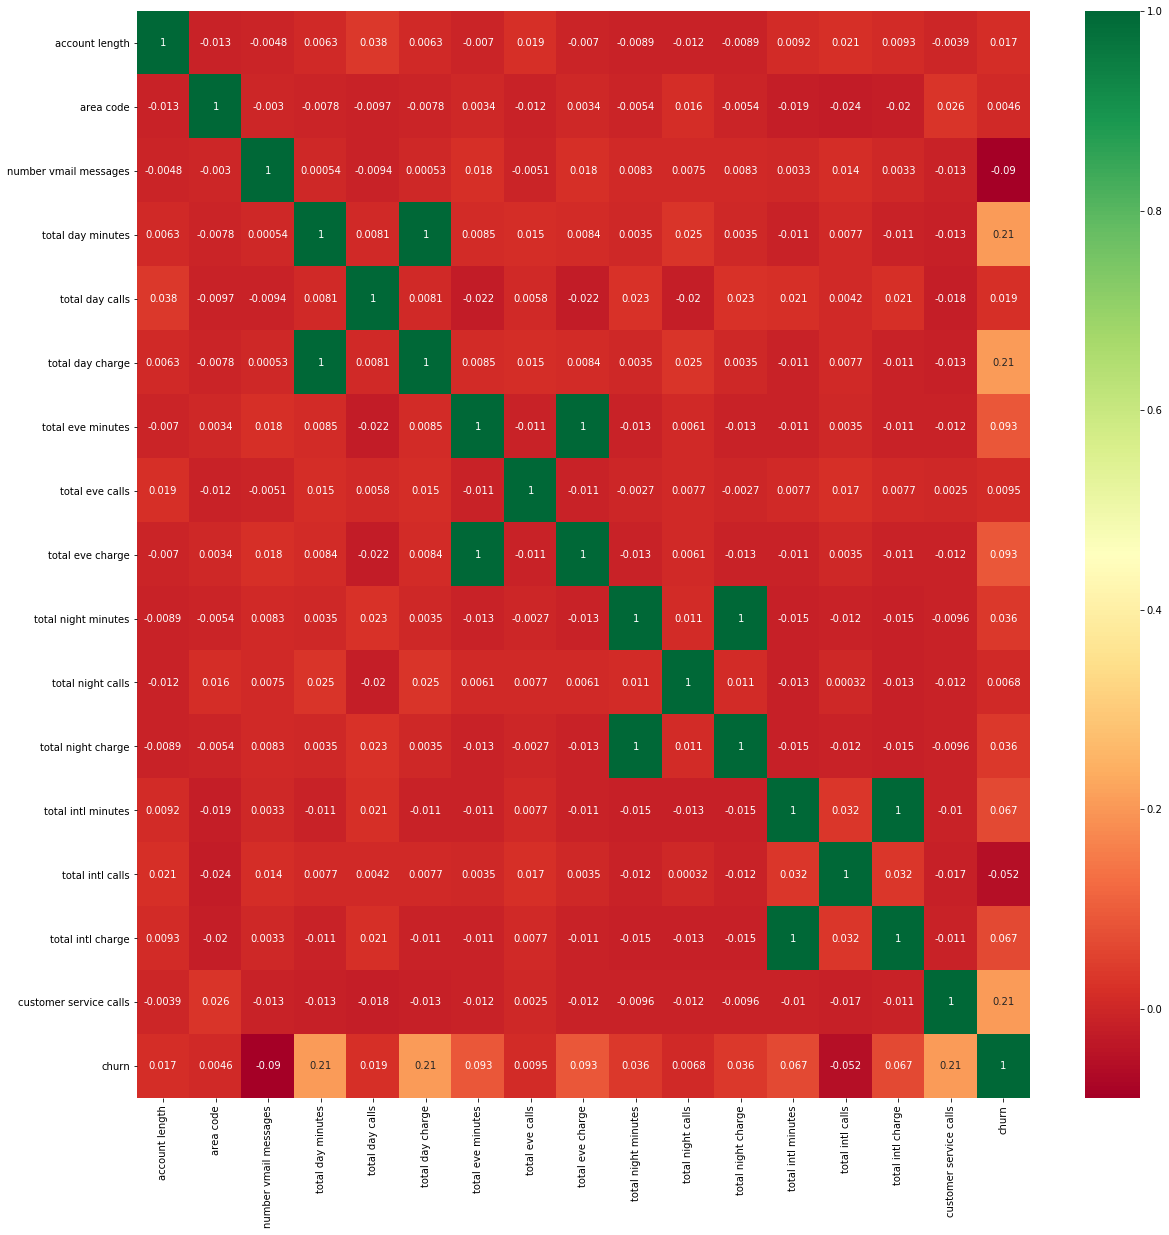

In [270]:
#chequeo de correlacion para feature engineering basico
corrmat = df.corr()
corrmat
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [306]:
#Eliminacion de variables por correlacion
df=df.drop(['phone number','total day minutes','total eve minutes','total night minutes','total intl minutes' ],axis=1)
df.shape

(3323, 16)

In [307]:
#Separa variable objetivo
X=df.iloc[:,0:df.shape[1]-1]
Y=df.iloc[:,df.shape[1]-1]

In [308]:
#Variables Dummy
state=pd.get_dummies(X['state'],drop_first=True)
intplan=pd.get_dummies(X['international plan'],drop_first=True)
vmplan=pd.get_dummies(X['voice mail plan'],drop_first=True)
intplan = intplan.rename(columns={'yes':'intplan'})
vmplan = vmplan.rename(columns={'yes':'vmplan'})
X=X.drop(['state','international plan','voice mail plan'],axis=1)
X=pd.concat([X,state,intplan,vmplan],axis=1)
X.head()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,TX,UT,VA,VT,WA,WI,WV,WY,intplan,vmplan
0,128,415,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,1,0


In [309]:
# Optimizacion de hiper parametros

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [310]:
#Obtencion y guardado serializado del modelo
clf = random_search.best_estimator_
dump(clf, 'modelapi.joblib')

['modelapi.joblib']

In [311]:
# Se guardan y se serializan las variables del modelo inicial, esto es necesario porque cuando se construye
# la app, la cantidad de variables dummy sera muy probablemente menor, por lo que para aplicar el modelo 
# debemos recostruirlas y llenarlas con ceros

model_columns = list(X.columns)
dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

In [312]:
#Parametros obtenizos del random search
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [313]:
# como demostracion mostramos el valor de ROC obtenido, obviamente es alto porque estamos evaluando
# pero para el objetivo de este trabajo es suficiente
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)
score.mean()

0.9518560729404104

Hasta este punto logramos obtener un modelo, sin embargo, para que la API funcione o mas independiente posible de la plataforma sobre la que se consutruye debemos asegurarnos de poder procesar en ella una operacion de POST con unas entradas en formato JSON, en las siguientes lineas se prueba cual debe ser el tratamiento de las observaciones de prueba generadas al inicio del notebook y que deben ser realizadas tambien en la aplicacion:

In [314]:
# Es este bloque realizamos el mismo procesamiento realizado antes para la generacion 
# del dataset de training del modelo

import json
jdata = json.loads(apiTestJson)
query_df = pd.DataFrame(jdata)
query_df=query_df.drop(['phone number','total day minutes','total eve minutes','total night minutes','total intl minutes' ],axis=1)
query_df=query_df.drop(['churn'],axis=1)
stateq=pd.get_dummies(query_df['state'],drop_first=True)
intplanq=pd.get_dummies(query_df['international plan'],drop_first=True)
vmplanq=pd.get_dummies(query_df['voice mail plan'],drop_first=True)
intplanq = intplanq.rename(columns={'yes':'intplan'})
vmplanq = vmplanq.rename(columns={'yes':'vmplan'})
query_df=query_df.drop(['state','international plan','voice mail plan'],axis=1)
query_df=pd.concat([query_df,stateq,intplanq,vmplanq],axis=1)
query_df.head()

,account length,area code,customer service calls,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total intl calls,total intl charge,...,GA,KS,LA,MS,NJ,NM,VA,WV,WY,vmplan
0,155,408,1,39,106,31.16,101,17.43,7,1.38,...,0,0,1,0,0,0,0,0,0,1
1,114,415,0,34,109,26.25,142,18.82,5,2.78,...,0,0,0,1,0,0,0,0,0,1
2,96,408,1,29,91,25.50,75,13.55,3,2.30,...,0,0,0,0,0,0,0,0,0,1
3,43,408,3,35,105,34.03,88,20.77,4,3.13,...,0,0,0,0,0,0,1,0,0,1
4,101,415,0,33,108,34.02,122,16.06,4,4.19,...,1,0,0,0,0,0,0,0,0,1


In [315]:
# aqui comprobamos que las dimensiones NO los las mismas de antes para ingresarlas al modelos
#como era de esperarse
query_df.shape

(10, 22)

In [316]:
# Para corregir lo anterior es necesari incluir las columnas que no se crearon al crear las nuevas dummies
# y llenar sus valores con ceros

query_df = query_df.reindex(columns=model_columns, fill_value=0)


In [317]:
#ahora la cantidad de variables es la adecuada
query_df.shape

(10, 64)

In [318]:
# Asi finalmente podemos hacer la prediccion y ya tenemos el condigo que necsitaremos en nuestra App

prediction = str(clf.predict(query_df))
prediction

'[False False False False False False False False False False]'